# Biraj Shrestha (Ace079bct024)
# Lab 2
## Objectives:<br>
- To understand and remember teh complete Machine Learning(ML) pipeline by applying it step-by-step to a Linear Regression porblem
- To train and evaluate linear regression models
- To interpret model coefficients and intercepts
- To compare single-feature vs multi-feature regression models

## Theory:
<u>**Machine Learning**</u> <br>
    &nbsp; &nbsp; &nbsp; &nbsp; Machine Learning (ML) enables computers to learn patterns from data and make predictions. In supervised learning, models are trained using labeled data, where input features are used to predict a continuous output variable.

<u>Machine Learning Pipeline</u> <br>
The ML pipeline consists of the following steps:<br>
    -Data Collection: Obtain relevant dataset for prediction.   <br> 
    -Data Cleaning: Handle missing values and ensure correct data types.<br>
    -Feature Design: Select important input variables influencing the target.<br>
    -Algorithm Selection: Choose an appropriate model (Linear Regression for continuous prediction).<br>
    -Loss Function: Use Mean Squared Error (MSE) to measure prediction error.<br>
    -Model Training: Learn optimal parameters from training data.<br>
    -Model Evaluation: Evaluate performance using MSE and R² score.<br><br>


<u>Linear Regression </u><br>
&nbsp; &nbsp; &nbsp; Linear Regression is a **supervised learning algorithm** used to predict continuous values.

<u>General Equation</u>
$$
y = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + \dots + \beta_n x_n 
$$

- **Intercept ($\beta_0$):** Baseline prediction  
- **Coefficient ($\beta$):** Change in output per unit change in input  
- **MSE (Mean Squared Error):** Measures prediction error  
- **$R^2$ Score:** Measures how well the model explains variance  

Types of Linear Regression

- **Simple Linear Regression:** Uses one feature  
- **Multiple Linear Regression:** Uses multiple features for better accuracy  

## Task 1: Simple Linear Regression

#### Step1: Data Retrieval and Collection

In [32]:
import pandas as pd

# Load dataset from local file
df = pd.read_csv("housing.csv")

# Display basic information
print("Shape of dataset:", df.shape)
print("\nColumn Names:\n", df.columns)

df.head()

Shape of dataset: (20640, 10)

Column Names:
 Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='str')


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


#### Step2: Data Cleaning
The California housing CSV usually contains a column called ocean_proximity (categorical feature), which must be handled.

In [33]:
df.isnull().sum()
df.dtypes

longitude             float64
latitude              float64
housing_median_age    float64
total_rooms           float64
total_bedrooms        float64
population            float64
households            float64
median_income         float64
median_house_value    float64
ocean_proximity           str
dtype: object

In [34]:
df["total_bedrooms"] = df["total_bedrooms"].fillna(
    df["total_bedrooms"].median()
)

#### Step3: Feature Design


In [35]:
X = df[["housing_median_age"]]
y = df["median_house_value"]

#### Step4: Algorithm Selection


In [36]:
from sklearn.linear_model import LinearRegression

#### Step5: Loss Function Selection

Mean Squared Error(MSE) is selected as it measures the average squared difference between actual and predicted values.

$$
\text{MSE} = \frac{1}{n} \sum_{i=1}^{n} (y_{\text{true},i} - y_{\text{pred},i})^2
$$

Lower MSE → better model.

#### Step6: Model Training
The model learns:<br>
-Best slope (coefficient)<br>
-Best intercept<br>
-By minimizing MSE on training data.<br>

In [37]:
from sklearn.model_selection import train_test_split

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Create model
model_simple = LinearRegression()

# Train model
model_simple.fit(X_train, y_train)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


#### Step7: Model Evaluation

In [38]:
from sklearn.metrics import mean_squared_error, r2_score

# Predictions
y_pred = model_simple.predict(X_test)

# Evaluation metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("MSE:", mse)
print("R2 Score:", r2)

MSE: 12939617265.100323
R2 Score: 0.012551235533311389


#### Step8: Model Interpretation

In [39]:
print("Coefficient (Slope):", model_simple.coef_[0])
print("Intercept:", model_simple.intercept_)

Coefficient (Slope): 951.4618671495987
Intercept: 179975.00158647486


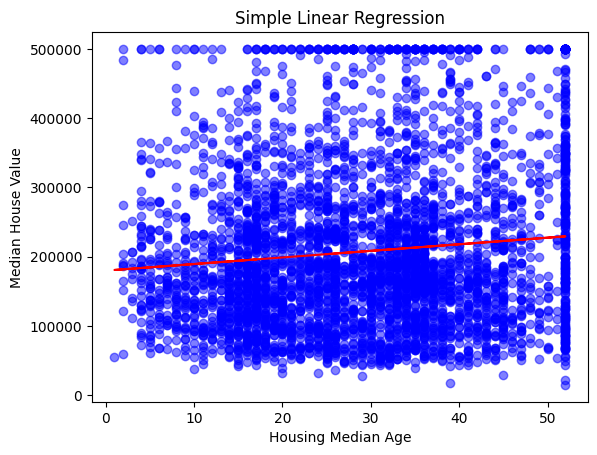

In [40]:
import matplotlib.pyplot as plt

plt.scatter(X_test, y_test, color="blue", alpha=0.5)
plt.plot(X_test, y_pred, color="red")
plt.xlabel("Housing Median Age")
plt.ylabel("Median House Value")
plt.title("Simple Linear Regression")
plt.show()

## Task2: Mulitple Linear Regression

#### Step2: Data Cleaning

In [41]:
df = pd.get_dummies(df, drop_first=True)

#### Step3: Feature Design

In [42]:
X_multi = df.drop("median_house_value", axis=1)
y_multi = df["median_house_value"]

In [43]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_multi)

#### Step4: Algorithm Selection

Linear Regression Model

Now modeling:

$$
y = b_0 + b_1 x_1 + b_2 x_2 + \dots + b_n x_n
$$

#### Step5: Loss Function
MSE(same)


#### Step5: Model Training

In [44]:
X_train_m, X_test_m, y_train_m, y_test_m = train_test_split(
    X_scaled, y_multi, test_size=0.2, random_state=42
)

model_multi = LinearRegression()
model_multi.fit(X_train_m, y_train_m)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


#### Step 6: Model Training


In [45]:
X_train_m, X_test_m, y_train_m, y_test_m = train_test_split(
    X_scaled, y_multi, test_size=0.2, random_state=42
)

model_multi = LinearRegression()
model_multi.fit(X_train_m, y_train_m)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


#### Step 7: Model Evaluation

In [46]:
y_pred_m = model_multi.predict(X_test_m)

mse_m = mean_squared_error(y_test_m, y_pred_m)
r2_m = r2_score(y_test_m, y_pred_m)

print("Multiple Regression MSE:", mse_m)
print("Multiple Regression R2:", r2_m)

Multiple Regression MSE: 4908476721.156615
Multiple Regression R2: 0.6254240620553606


#### Step 8: Model Interpretation

In [47]:
print("Intercept:", model_multi.intercept_)
coefficients = pd.DataFrame({
    "Feature": X_multi.columns,
    "Coefficient": model_multi.coef_
})
print(coefficients)

Intercept: 206645.58580614213
                       Feature   Coefficient
0                    longitude -53770.029490
1                     latitude -54397.869794
2           housing_median_age  13871.277832
3                  total_rooms -13136.290362
4               total_bedrooms  43107.993243
5                   population -43228.323370
6                   households  18448.016131
7                median_income  74991.698606
8       ocean_proximity_INLAND -18519.174847
9       ocean_proximity_ISLAND   2118.437572
10    ocean_proximity_NEAR BAY  -1613.263839
11  ocean_proximity_NEAR OCEAN   1149.278388


## Discussion and Conclusion


The simple linear regression model, which used only housing median age, showed limited predictive power. The low R² value indicates that housing age alone cannot adequately explain variations in house prices. Although the model was easy to interpret, it oversimplified the relationship between features and the target variable. In contrast, the multiple linear regression model demonstrated significantly better performance. By incorporating all available features, the model captured more information about the housing market. This resulted in lower MSE and higher R² values, confirming that house prices depend on multiple interacting factors such as income, number of rooms, and population.

This lab successfully demonstrated the complete machine learning pipeline using linear regression. The simple regression model helped build foundational understanding, while the multiple regression model improved prediction accuracy by using more relevant features. The results highlight the importance of proper data preprocessing, feature selection, and model evaluation in building effective machine learning models.